In [1]:
import pandas as pd
import numpy as np

In [182]:
#read in data
all_fund = pd.read_csv('all_companies_fund.csv') #2000-2019
all_bank = pd.read_csv('all_bankruptcies.csv', encoding = "ISO-8859-1") #2000-2019

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (263,341) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
#keys to join all databases
key_table = all_fund[['cik', 'GVKEY']] 
key_table = key_table.drop_duplicates()
key_table.head()

,cik,GVKEY
0,1750.0,1004
19,910627.0,1010
23,61478.0,1013
34,2668.0,1019
36,319126.0,1021


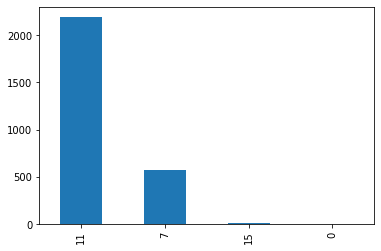

In [170]:
all_bank['BANKRUPTCY_TYPE'].value_counts().plot(kind = 'bar')

In [183]:
#extract useful information
all_bank = all_bank[['BANKRUPTCY_TYPE', 'BANK_BEGIN_DATE', 'SIC_CODE_FKEY', 'SIC_CODE_DESCRIP', 'NAICS_CODE_DESCRIP', 'NAICS_CODE_FKEY', 'SHORT_NAME', 'NAME']]

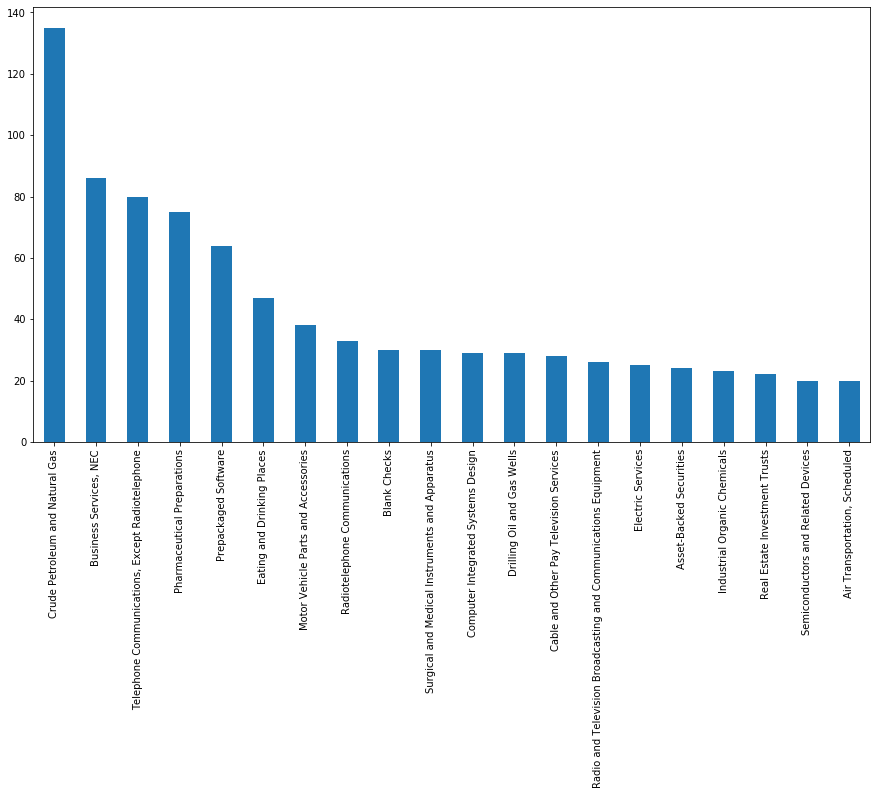

In [199]:
all_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

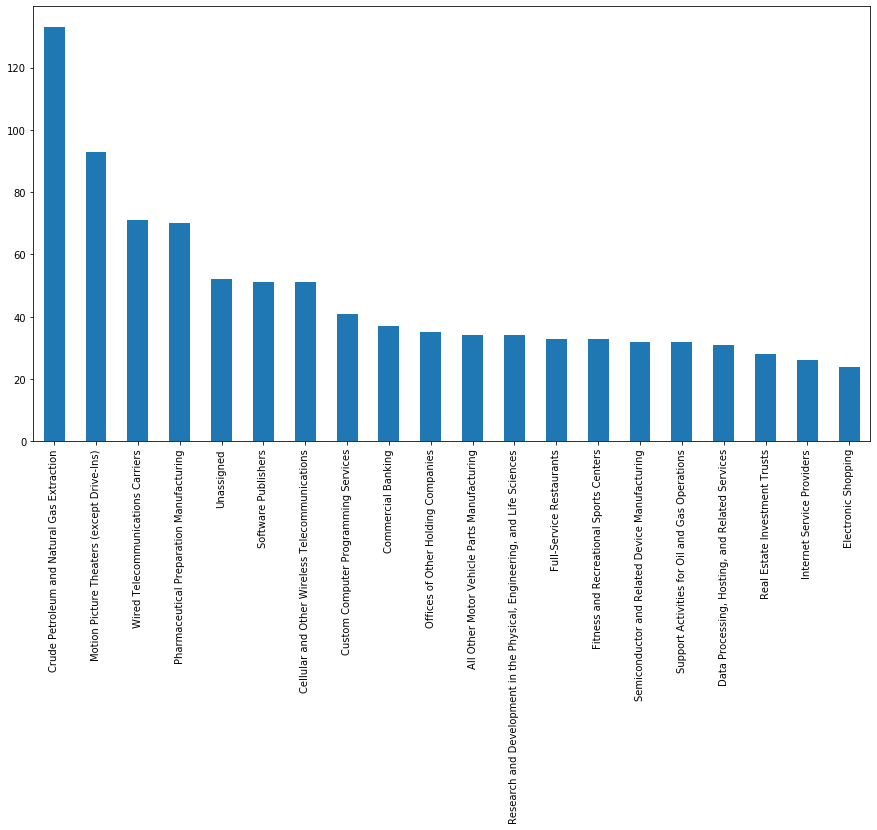

In [200]:
all_bank['NAICS_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

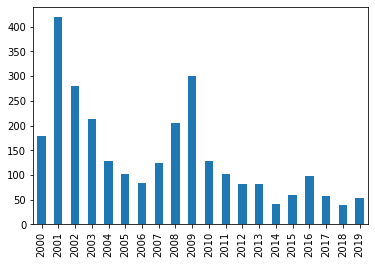

In [212]:
all_bank['year'] = pd.to_datetime(all_bank['BANK_BEGIN_DATE']).dt.year
all_bank['year'].value_counts().sort_index().plot(kind = 'bar')

In [203]:
# gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# # file = open('all_GVKEY.txt','w')
# # for i in all_fund['GVKEY']:
# #     file.write(str(i))
# #     file.write('\n')
# # file.close()

print(all_fund['GVKEY'].nunique(), 'of unique GVKEYs')
print(all_fund['cik'].nunique(), 'of unique ciks')
print('cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped')

24933 of unique GVKEYs
17998 of unique ciks
cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped
